In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
df = pd.read_csv("duolingo_reviews_cleanwemoji.csv")
df.head()


,content
0,bug new updates inlesson streak UI green Bolt ...
1,thing ressetted day streekI hate stuipid duoli...
2,Whats happened animation validation last updat...
3,please dont immediately stop speaking lessons ...
4,I love app


In [13]:
sia = SentimentIntensityAnalyzer()


In [14]:
def get_sentiment(text):
    score = sia.polarity_scores(text)#Tokenizes the text into words and Assigns lexicon scores(polarity_scores)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [15]:
df['sentiment'] = df['content'].apply(get_sentiment)#apply sentiment analysis to the content column 

In [16]:
df['vader_scores'] = df['content'].apply(lambda x: sia.polarity_scores(str(x)))


In [17]:
print(df[['content', 'sentiment', 'vader_scores']].head())

                                             content sentiment  \
0  bug new updates inlesson streak UI green Bolt ...  positive   
1  thing ressetted day streekI hate stuipid duoli...  negative   
2  Whats happened animation validation last updat...   neutral   
3  please dont immediately stop speaking lessons ...  negative   
4                                         I love app  positive   

                                        vader_scores  
0  {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...  
1  {'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.206, 'neu': 0.617, 'pos': 0.177, 'co...  
4  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  


In [18]:
print("\nSentiment values:")
print(df['sentiment'].value_counts())


Sentiment values:
sentiment
positive    1151
neutral      116
negative      99
Name: count, dtype: int64


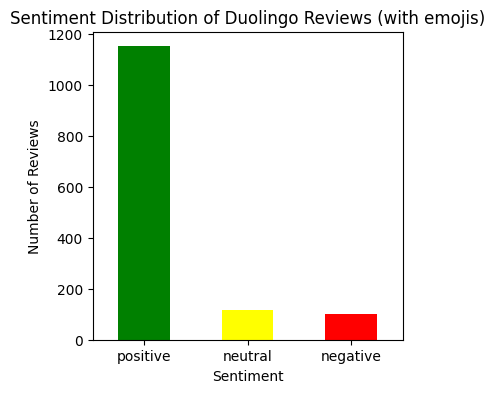

In [19]:
#graphical representation
sentiment_counts = df['sentiment'].value_counts()
colors = {"negative": "red", "neutral": "yellow", "positive": "green"}

plt.figure(figsize=(4,4))
sentiment_counts.plot(kind='bar', color=[colors[s] for s in sentiment_counts.index])
plt.title("Sentiment Distribution of Duolingo Reviews (with emojis)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [20]:
#df[['content', 'sentiment', 'vader_scores']].to_csv("duolingo_vader_scores.csv", index=False)